In [41]:
import km3io as kio
import km3pipe as kp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [42]:
def stop_pos(f_,cuts_) :
    start_pos = [f_.events.tracks.pos_x[cuts_][:,0].__array__(),
                 f_.events.tracks.pos_y[cuts_][:,0].__array__(),
                 f_.events.tracks.pos_z[cuts_][:,0].__array__()]
    
    start_pos = np.stack(start_pos)

    tracklength = f_.events.tracks.fitinf[cuts_][:,0,10].__array__()

    stop_pos = np.stack([start_pos[0,:] + f_.events.tracks.dir_x[cuts_][:,0].__array__() * tracklength,
                        start_pos[1,:] + f_.events.tracks.dir_y[cuts_][:,0].__array__() * tracklength,
                        start_pos[2,:] + f_.events.tracks.dir_z[cuts_][:,0].__array__() * tracklength])
    
    return stop_pos, start_pos, tracklength

In [43]:
def DOM():
    """Reads DOM file and store list of positions, ids and dictionary"""


    #Read DOMS information on positions and id
    det = kp.hardware.Detector('/home/celestin/Documents/km3netdata_internship/ARCA/KM3NeT_00000075_20220408.detx')
    
    #Store position of DOMS in a np.array ([xxx][yyyy][zzzz])
    dom_x = []
    dom_y = []
    dom_z = []
    dom_id = []

    for dom,pos in det.dom_positions.items():
        dom_x.append(pos[0])
        dom_y.append(pos[1])
        dom_z.append(pos[2])
        dom_id.append(dom)
    
    dom_positions = np.array((dom_x,dom_y,dom_z))

    #Transpose the arrays to make a for loop for each distance
    dom_positions_bis = dom_positions.T
    

    #create dictionary of id vs index
    dict_id = {}
    for i in range(len(dom_positions_bis)):
        dict_id[i] = dom_id[i]
        
    return dom_positions_bis, dict_id

In [44]:
def plot3D(stop_pos,dom_positions):
    """Plots the stop positions in a 3D plot"""
    
    #3D plot stop positions cuts_bis

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')

    x = stop_pos[0]
    y = stop_pos[1]
    z = stop_pos[2]
    
    ax.scatter3D(dom_positions.T[0],dom_positions.T[1],dom_positions.T[2], s=50, c="red",depthshade=False, marker="o",label="second")
    ax.scatter3D(x, y, z,s=0.5,depthshade=False, marker=".",label="first")

    ax.set_title("Stop Positions")
    
    return ax

In [45]:
def plot1var(df,var,var_min=False,var_max=False,logscale_x=False,logscale_y=False,title=False) :
    fig, ax = plt.subplots (figsize = (7,7))
    
    if type(var_min) != bool and type(var_max) != bool :
        min_x = var_min
        max_x = var_max
    else :
        min_x = df[var].min()
        max_x = df[var].max()
        
    if logscale_x:
        ax.set_xscale('log')

    if logscale_y :
        ax.set_yscale('log')
        
    bins=np.linspace(min_x,max_x,150)
        
    ax.hist(df[var],bins)
    ax.set_xlabel(f'{var}')
    ax.set_xlim(min_x,max_x)
    
    if type(title) != bool :
        ax.set_title(title)
    else :
        ax.set_title(f'{var}')

    return ax

In [46]:
def plot1var_subplot(var,var_min=False,var_max=False,ymin=False,ymax=False,logscale_x=False,logscale_y=False,title=False) :

    nvar = len(var)

    if type(var_min) != bool and type(var_max) != bool :
        min_x = var_min
        max_x = var_max
    else :
        min_x = var[0].min()
        max_x = var[0].max()

    bins=np.linspace(min_x,max_x,150)

    fig, ax = plt.subplots(nvar,1)
    
    for i in range(nvar) :
        ax[i].hist(var[i],bins)
        if ymin != False and ymax != False :
            ax[i].set_yrange([0,4000])
        if type(title) != bool :
            ax[i].set_title(title[i])
        else :
            ax[i].set_title(f'{var[i]}')
        if logscale_x == True :
            ax[i].set_xscale('log')
        if logscale_y == True :
            ax[i].set_yscale('log')


    fig.tight_layout()

    return ax

In [47]:
def plot1var_overplot(df,var,var_min=False,var_max=False,logscale_x=False,logscale_y=False,title=False,var_names=False) :

    nvar = len(df)

    if type(var_min) != bool and type(var_max) != bool :
        min_x = var_min
        max_x = var_max
    else :
        min_x = df[0][var].min()
        max_x = df[0][var].max()

    bins=np.linspace(min_x,max_x,150)

    fig, ax = plt.subplots(figsize=(7,7))
    
    for i in range(nvar) :
        ax.hist(df[i][var],bins,label=var_names[i])
    if type(title) != bool :
        ax.set_title(title)
    else :
        ax.set_title(f'{var[0]}')
    if logscale_x == True :
        ax.set_xscale('log')
    if logscale_y == True :
        ax.set_yscale('log')
    ax.set_xlabel(f'{var}')
    ax.legend()

    fig.tight_layout()

    return ax

In [48]:
def plot2var(df,var1,var2,var1_min=False,var2_min=False,var1_max=False,var2_max=False,logscale_x=False,logscale_y=False) :
    
    fig, ax = plt.subplots (figsize = (7,7))

    if type(var1_min) != bool and type(var1_max) != bool :
        min_x = var1_min
        max_x = var1_max
    else :
        min_x = df[var1].min()
        max_x = df[var1].max()

    if type(var2_min) != bool and type(var2_max) != bool :
        min_y = var2_min
        max_y = var2_max
    else :
        min_y = df[var2].min()
        max_y = df[var2].max()
    
    if logscale_x:
        ax.set_xscale('log')
    bins_x=np.linspace(min_x,max_x,500)

    if logscale_y :
        ax.set_yscale('log')
    bins_y = np.linspace(min_y,max_y, 500)

    h2=ax.hist2d(df[var1],df[var2],bins=[bins_x,bins_y],norm=mpl.colors.LogNorm())
    ax.set_xlabel(f'{var1}')
    ax.set_ylabel(f'{var2}')
    ax.set_xlim(min_x,max_x)
    ax.set_ylim(min_y,max_y)
    ax.set_title(f'{var1} vs {var2}')
    fig.colorbar(h2[3])
    

    return h2

In [49]:
def plot2var_subplot(df,var1,var2,var1_min=False,var2_min=False,var1_max=False,var2_max=False,logscale_x=False,logscale_y=False,title=False) :
    
    if type(var1) == list :
        nvar=len(var1)*2
    else : nvar = 2

    plt.figure(figsize = (7,7))

    if type(var1_min) != bool and type(var1_max) != bool :
        min_x = var1_min
        max_x = var1_max
    else :
        min_x = df[0][var1].min()
        max_x = df[0][var1].max()

    if type(var2_min) != bool and type(var2_max) != bool :
        min_y = var2_min
        max_y = var2_max
    else :
        min_y = df[0][var2].min()
        max_y = df[0][var2].max()
    
    
    bins_x=np.linspace(min_x,max_x,150)

    
    bins_y = np.linspace(min_y,max_y, 150)

    for i in range(nvar) :
        plt.subplot(nvar,1,i+1)
        if logscale_x:
            plt.xscale('log')
        if logscale_y :
            plt.yscale('log')
        h2 = plt.hist2d(df[i][var1],df[i][var2],bins=[bins_x,bins_y],norm=mpl.colors.LogNorm())
        plt.xlabel(f'{var1}')
        plt.ylabel(f'{var2}')
        plt.colorbar(h2[3])
        if type(title) != bool :
            plt.title(title[i])

        plt.tight_layout()

    return

In [50]:
def plot2var_scatter(df,var1,var2,var1_min=False,var2_min=False,var1_max=False,var2_max=False,logscale_x=False,logscale_y=False,title=False,s=1) :
    
    if len(df) != 1 :
        n = len(df)
    else : 
        n = 1

    plt.figure(figsize = (7,7))

    for i in range(n) :
        plt.subplot(n,1,i+1)
        if logscale_x:
            plt.xscale('log')
        if logscale_y :
            plt.yscale('log')
        h2 = plt.plot(df[i][var1],df[i][var2],"o",markersize=s)
        plt.xlabel(f'{var1}')
        plt.ylabel(f'{var2}')
        if type(title) != bool :
            plt.title(title[i])
        if type(var1_min) != bool and type(var1_max) != bool :
            plt.xlim(var1_min,var1_max)
        if type(var2_min) != bool and type(var2_max) != bool :
            plt.ylim(var2_min,var2_max)
        plt.tight_layout()

    return

In [51]:
def linear(x1,y1,x2,y2) :
    m = (y1-y2)/(x1-x2)
    n = y1 - m * x1
    return m,n

In [52]:
def VolumeCut(pos_stop,xred,yred,zinf,zsup):
    """Returns boolean list for cut based on stop positions inside a given volume, plus cuts in each direction
    Returns also the stop positions as a list of coordinates"""

    pos_stop_bis = pos_stop.T

    #Compute cuts_volume
    cuts_volume = []    
    
    #Define limits of our volume, taking into account the cut in each direction
    x_lim = [-29.5+xred,249.2-xred]
    y_lim = [107.05+yred,214.4-yred]
    z_lim = [0+zinf,689.164-zsup]
    
    #Loop over all events
    coordinates = []
    
    for i in range(len(pos_stop_bis)):   
        
        x,y,z = pos_stop_bis[i,0],pos_stop_bis[i,1],pos_stop_bis[i,2] #coordinates of points of the events
        
            
        if (z >= z_lim[0]) & (z <= z_lim[1]): #check if in z range
            
            if (y >= y_lim[0]) & (y <= y_lim[1]):  #check if in y range
                
                if (x >= x_lim[0]) & (x <= x_lim[1]):
                    cuts_volume.append(True)
                    coordinates.append([x,y,z])

                else:
                    cuts_volume.append(False)

            else:
                cuts_volume.append(False)
                
        else:
            cuts_volume.append(False)


    return cuts_volume, coordinates

In [53]:
if __name__ == "__main__" :

    fileName = '/home/celestin/Documents/km3netdata_internship/ARCA/data.v6.3.retr.jchain.aanet.100_dst_merged.root'
    f1 = kio.OfflineReader(fileName)

    fileName = '/home/celestin/Documents/km3netdata_internship/ARCA/mc.v6.3.mupage_100G.sirene.9X_10X_dst_merged.root'
    f2 = kio.OfflineReader(fileName)

In [54]:
    # ARCA datas

    haveTrk1 = np.array(f1.events.n_tracks, dtype=bool)

    cuts1 = (f1.events.tracks.E[haveTrk1][:,0] > 2.) & (f1.events.tracks.lik[haveTrk1][:,0] > 200.) & (f1.events.tracks.dir_z[haveTrk1][:,0] < 0.)
    
    stop_pos1, start_pos1, tracklength1 = stop_pos(f1,cuts1)
    
    cuts1_volume, coordinates1 = VolumeCut(stop_pos1,xred=0,yred=0,zinf=20,zsup=0)

    filtered_events1 = f1.events[haveTrk1][cuts1][cuts1_volume]

    data_tuples = list(zip(filtered_events1.id,filtered_events1.run_id,filtered_events1.t_sec,filtered_events1.t_ns,filtered_events1.events.tracks.E[:,0].__array__(),filtered_events1.events.tracks.lik[:,0].__array__(),filtered_events1.events.tracks.dir_x[:,0].__array__(),filtered_events1.events.tracks.dir_y[:,0].__array__(),filtered_events1.events.tracks.dir_z[:,0].__array__(),start_pos1[0],start_pos1[1],start_pos1[2],tracklength1,coordinates1[0],coordinates1[1],coordinates1[2],filtered_events1.events.tracks.E[:,0].__array__()/tracklength1,filtered_events1.events.n_hits.__array__(),filtered_events1.events.n_tracks.__array__(),filtered_events1.events.tracks.t.__array__()))
    df1 = pd.DataFrame(data_tuples, columns=['id','run_id','t_sec','t_ns','E_GeV',"lik","dir_x","dir_y","dir_z","start_x","start_y","start_z","L","stop_x","stop_y","stop_z","E/L","n_hits","n_tracks","t"])

ValueError: operands could not be broadcast together with shapes (6933,) (12649,) 

In [ ]:
    # ARCA MC simulation

    haveTrk2 = np.array(f2.events.n_tracks, dtype=bool)

    cuts2 = (f2.events.tracks.E[haveTrk2][:,0] > 10.) & (f2.events.tracks.lik[haveTrk2][:,0] > 200.) & (f2.events.tracks.dir_z[haveTrk2][:,0] < 0.)
    
    stop_pos2, start_pos2, tracklength2 = stop_pos(f2,cuts2)

    cuts2_volume, coordinates2 = VolumeCut(stop_pos2,0,0,0,0)

    filtered_events2 = f2.events[cuts2][cuts2_volume]

    data_tuples = list(zip(filtered_events2.id,filtered_events2.run_id,filtered_events2.t_sec,filtered_events2.t_ns,filtered_events2.events.tracks.E[:,0].__array__(),filtered_events2.events.tracks.lik[:,0].__array__(),filtered_events2.events.tracks.dir_x[:,0].__array__(),filtered_events2.events.tracks.dir_y[:,0].__array__(),filtered_events2.events.tracks.dir_z[:,0].__array__(),start_pos2[0],start_pos2[1],start_pos2[2],tracklength2,stop_pos2[0],stop_pos2[1],stop_pos2[2],filtered_events2.events.tracks.E[:,0].__array__()/tracklength2,filtered_events2.events.n_hits.__array__(),filtered_events2.events.n_tracks.__array__(),filtered_events2.events.tracks .t.__array__()))
    df2 = pd.DataFrame(data_tuples, columns=['id','run_id','t_sec','t_ns','E_GeV',"lik","dir_x","dir_y","dir_z","start_x","start_y","start_z","L","stop_x","stop_y","stop_z","E/L","n_hits","n_tracks","t"])

/tmp/ipykernel_26185/3656362825.py:11: RuntimeWarning: divide by zero encountered in true_divide
  data_tuples = list(zip(filtered_events2.id,filtered_events2.run_id,filtered_events2.t_sec,filtered_events2.t_ns,filtered_events2.events.tracks.E[:,0].__array__(),filtered_events2.events.tracks.lik[:,0].__array__(),filtered_events2.events.tracks.dir_x[:,0].__array__(),filtered_events2.events.tracks.dir_y[:,0].__array__(),filtered_events2.events.tracks.dir_z[:,0].__array__(),start_pos2[0],start_pos2[1],start_pos2[2],tracklength2,stop_pos2[0],stop_pos2[1],stop_pos2[2],filtered_events2.events.tracks.E[:,0].__array__()/tracklength2,filtered_events2.events.n_hits.__array__(),filtered_events2.events.n_tracks.__array__(),filtered_events2.events.tracks .t.__array__()))


2022-05-19 17:03:55 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:55 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:55 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:55 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:55 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:55 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:55 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:55 

++ Detector: Parsing the DETX header
++ Detector: Reading PMT information...
++ Detector: Done.
++ Detector: Parsing the DETX header
++ Detector: Reading PMT information...
++ Detector: Done.


2022-05-19 17:03:56 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:56 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:56 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:56 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:56 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-19 17:03:56 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.


++ Detector: Parsing the DETX header
++ Detector: Reading PMT information...
++ Detector: Done.
[[116.9   107.05   61.213]
 [116.9   107.05   97.772]
 [116.9   107.05  134.764]
 [116.9   107.05  171.078]
 [116.9   107.05  208.125]
 [116.9   107.05  245.323]
 [116.9   107.05  281.958]
 [116.9   107.05  319.073]
 [116.9   107.05  356.3  ]
 [116.9   107.05  392.705]
 [116.9   107.05  429.773]
 [116.9   107.05  466.784]
 [116.9   107.05  502.969]
 [116.9   107.05  540.206]
 [116.9   107.05  577.235]
 [116.9   107.05  613.316]
 [116.9   107.05  650.179]
 [116.9   107.05  685.333]
 [ 51.85  180.35   64.693]
 [ 51.85  180.35  101.953]
 [ 51.85  180.35  138.795]
 [ 51.85  180.35  175.109]
 [ 51.85  180.35  212.106]
 [ 51.85  180.35  249.004]
 [ 51.85  180.35  285.489]
 [ 51.85  180.35  322.853]
 [ 51.85  180.35  359.981]
 [ 51.85  180.35  396.236]
 [ 51.85  180.35  433.104]
 [ 51.85  180.35  469.815]
 [ 51.85  180.35  505.95 ]
 [ 51.85  180.35  543.037]
 [ 51.85  180.35  579.916]
 [ 51.85  180

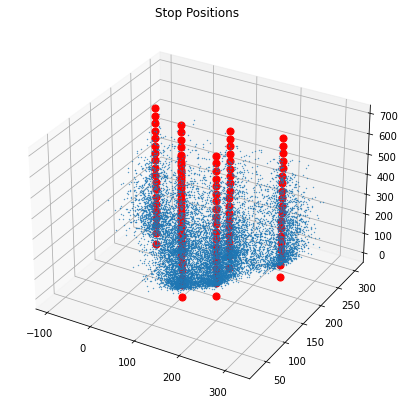

In [ ]:
    # stop muons positions

    plot3D(stop_pos1,DOM()[0])
    plot3D(stop_pos2,DOM()[0])

    plt.show()

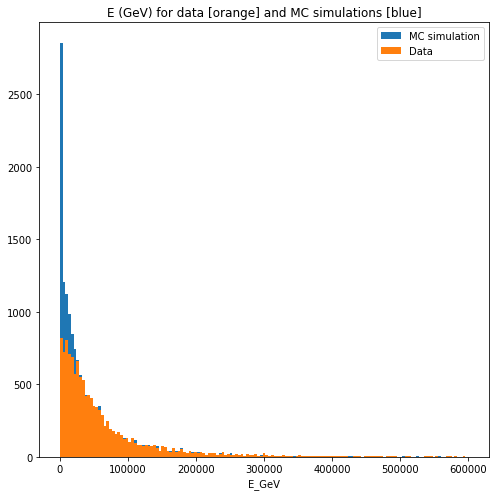

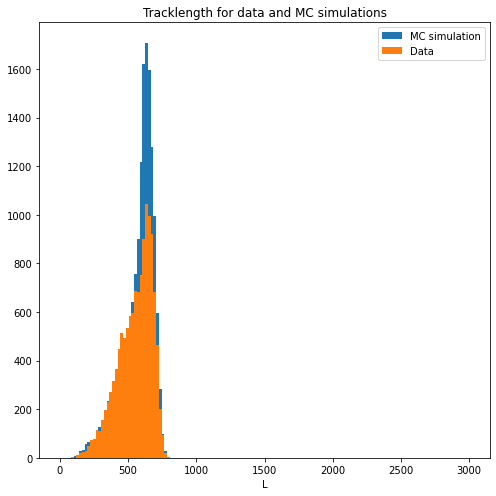

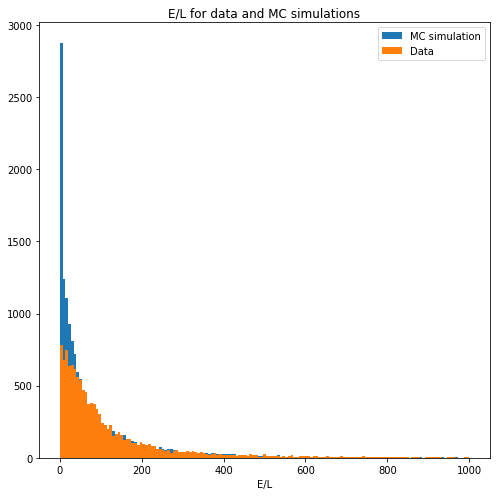

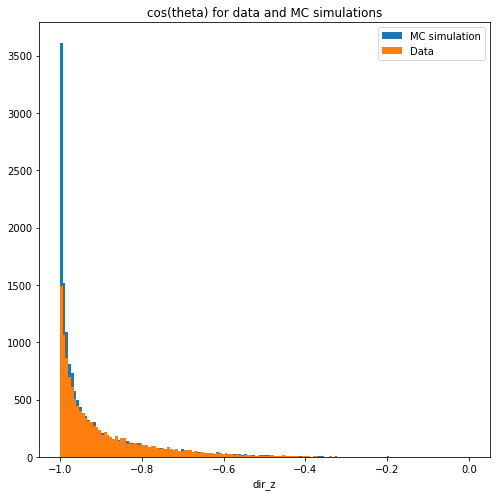

In [ ]:
    plot1var_overplot([df2,df1],var='lik',var_min=200,var_max=600,title='lik for data and MC simulations',var_names=['MC simulation','Data'])
    plot1var_overplot([df2,df1],var='E_GeV',var_min=0,var_max=0.6e6,title='E (GeV) for data [orange] and MC simulations [blue]',var_names=['MC simulation','Data'])
    plot1var_overplot([df2,df1],var='L',var_min=0,var_max=3000,title='Tracklength for data and MC simulations',var_names=['MC simulation','Data'])
    plot1var_overplot([df2,df1],var='E/L',var_min=0,var_max=1000,title='E/L for data and MC simulations',var_names=['MC simulation','Data'])
    plot1var_overplot([df2,df1],var='dir_z',var_min=-1,var_max=0,title='cos(theta) for data and MC simulations',var_names=['MC simulation','Data'])

    plt.show()

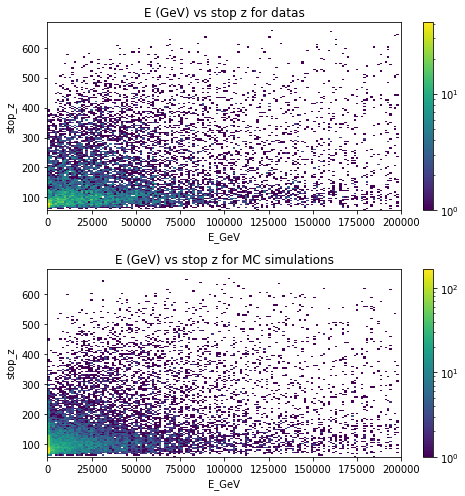

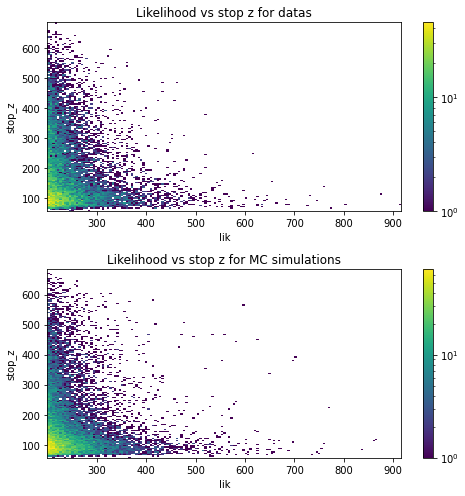

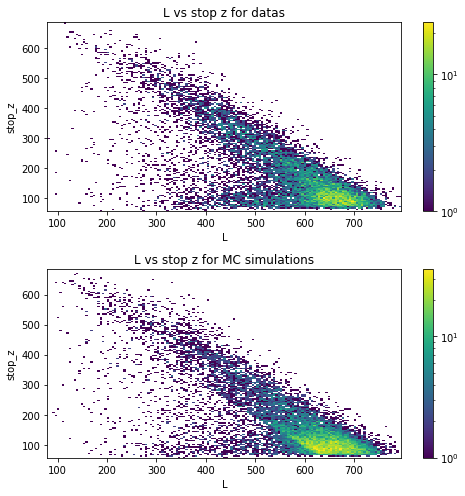

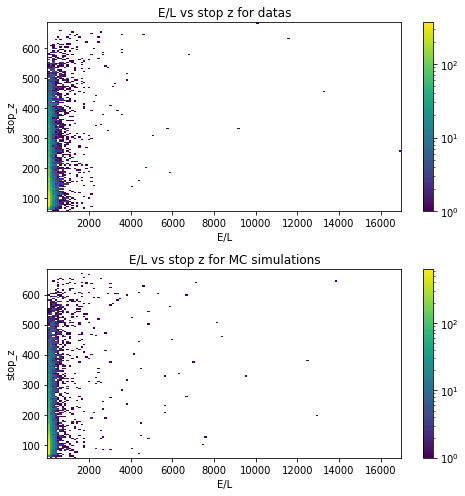

In [ ]:
    plot2var_subplot([df1,df2],'E_GeV','stop_z',var1_min=0,var1_max=2e5,title=['E (GeV) vs stop z for datas','E (GeV) vs stop z for MC simulations'])
    plot2var_subplot([df1,df2],'lik','stop_z',title=['Likelihood vs stop z for datas','Likelihood vs stop z for MC simulations'])
    plot2var_subplot([df1,df2],'L','stop_z',title=['L vs stop z for datas','L vs stop z for MC simulations'])
    plot2var_subplot([df1,df2],'E_GeV','lik',title=['E (GeV) vs likelihood for datas','E (GeV) vs likelihood for MC simulations'])
    plot2var_subplot([df1,df2],'E/L','stop_z',title=['E/L vs stop z for datas','E/L vs stop z for MC simulations'])

    plt.show()

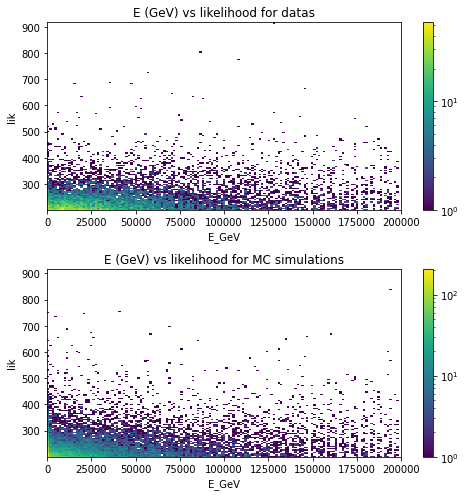

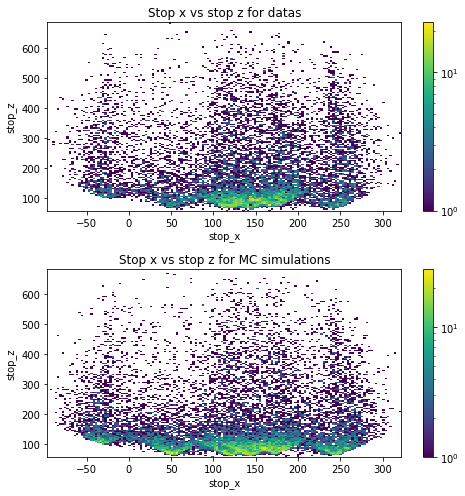

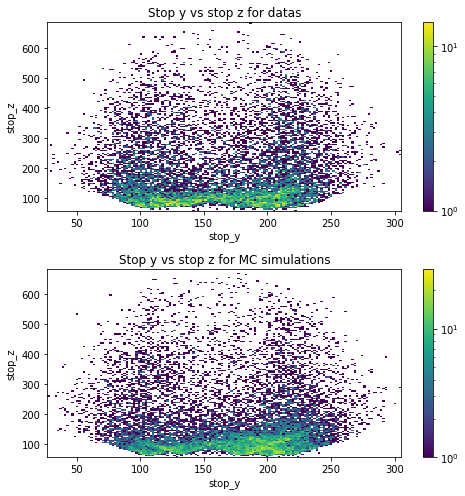

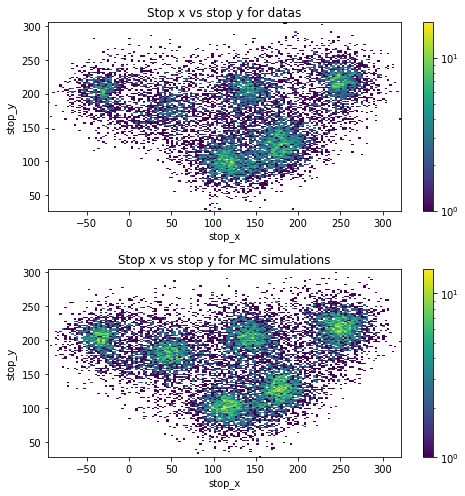

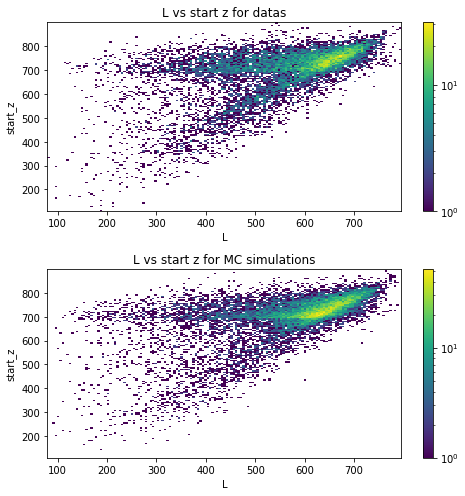

In [ ]:
    plot2var_subplot([df1,df2],'E_GeV','lik',var1_min=0,var1_max=2e5,title=['E (GeV) vs likelihood for datas','E (GeV) vs likelihood for MC simulations'])
    plot2var_subplot([df1,df2],'stop_x','stop_z',title=['Stop x vs stop z for datas','Stop x vs stop z for MC simulations'])
    plot2var_subplot([df1,df2],'stop_y','stop_z',title=['Stop y vs stop z for datas','Stop y vs stop z for MC simulations'])
    plot2var_subplot([df1,df2],'stop_x','stop_y',title=['Stop x vs stop y for datas','Stop x vs stop y for MC simulations'])
    plot2var_subplot([df1,df2],'L','start_z',title=['L vs start z for datas','L vs start z for MC simulations'])

    plt.show()

In [ ]:
    efficency = 100 * len(df1['n_tracks'])/len(df2['n_tracks'])
    print(efficency)
    efficency = 100 * len(df1['n_tracks'])/len(f1.events.n_tracks.__array__())
    print(efficency)
    efficency = 100 * len(df1['n_tracks'])/len(f2.events.n_tracks.__array__())
    print(efficency)

80.59768064228368
0.12664451897760456
0.2388159682147633


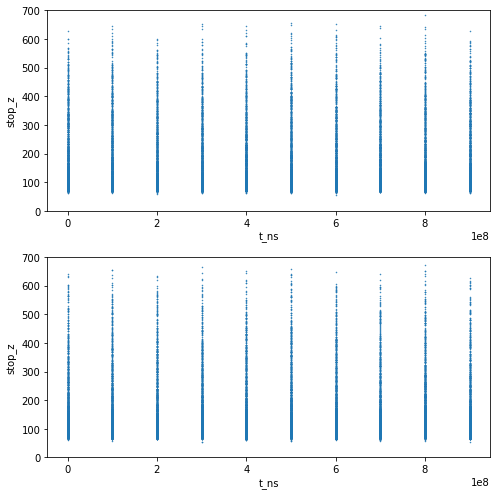

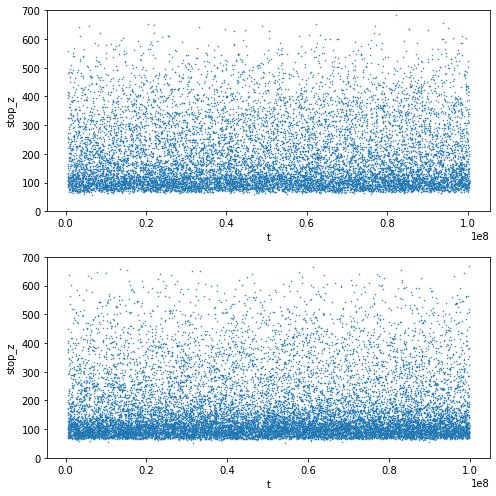

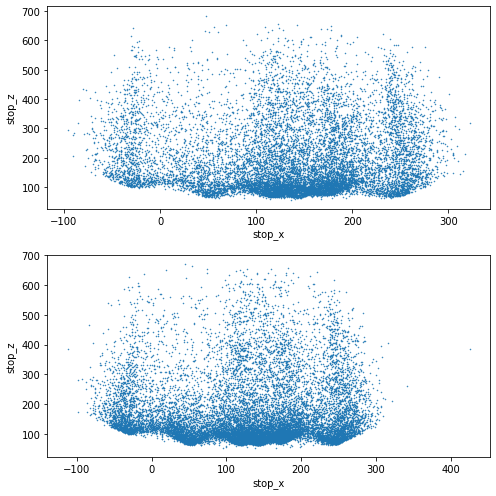

In [ ]:
    plot2var_scatter([df1,df2],'t_ns','stop_z',var2_min=0,var2_max=700,s=0.5)
    plot2var_scatter([df1,df2],'t','stop_z',var2_min=0,var2_max=700,s=0.5)

    plot2var_scatter([df1,df2],'stop_x','stop_z',s=0.5)
    
    plt.show()